In [8]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


In [13]:
data = pd.read_csv('Performanca_nxenesve.csv', sep='|')
data

,Gjinia,Raca/Etniciteti,Niveli_edukimit_prindit,Shujta_drekes_pakoja,Kurse_parapregaditore_ekstra,Matematike,Lexim,Shkrim
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Data preparation

In [14]:
print(f"Shape of the datsaet: {data.shape}")

print(f"Is there any null value: {data.isna().any()[lambda x: x] }")

Shape of the datsaet: (1000, 8)
Is there any null value: Series([], dtype: bool)


In [15]:
data.describe()

,Matematike,Lexim,Shkrim
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
data.value_counts()

Gjinia  Raca/Etniciteti  Niveli_edukimit_prindit  Shujta_drekes_pakoja  Kurse_parapregaditore_ekstra  Matematike  Lexim  Shkrim
female  group A          associate's degree       free/reduced          none                          37          57     56        1
male    group C          associate's degree       standard              completed                     57          54     56        1
                                                  free/reduced          completed                     60          51     56        1
                                                                                                      65          67     65        1
                                                                                                                  73     68        1
                                                                                                                                  ..
female  group D          associate's degree       standard              no

#### Data interpretation

In [17]:
# show education level for each gender

df_female = data[data['Gjinia'] == 'female']
df_male = data[data['Gjinia'] == 'male']

#df_female = df_female['Niveli_edukimit_prindit'].value_counts()
#df_male = df_male['Niveli_edukimit_prindit'].value_counts()
#df_female
#df_male

<Figure size 1400x800 with 0 Axes>

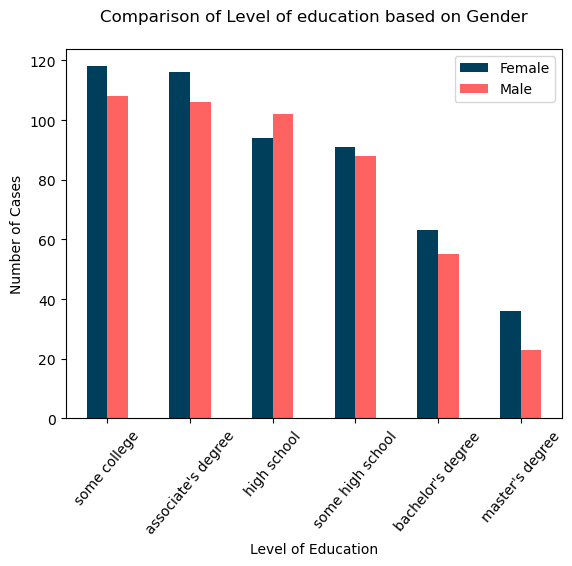

In [18]:

# Count the occurrences for each gender and infarct status
counts_female= df_female['Niveli_edukimit_prindit'].value_counts()
counts_male = df_male['Niveli_edukimit_prindit'].value_counts()

# Combine the counts into a DataFrame
counts_df = pd.DataFrame({
    'Female': counts_female,
    'Male': counts_male
}).fillna(0)

# Plotting the grouped bar chart
plt.figure(figsize=(14, 8))
counts_df.plot(kind='bar', color=['#003f5c',  '#ff6361'])
plt.title('Comparison of Level of education based on Gender', pad=20)
plt.xlabel('Level of Education')
plt.ylabel('Number of Cases')
plt.xticks(rotation=50)
plt.savefig('results/Comparison of Level of education based on Gender.png', format='png')
plt.show()

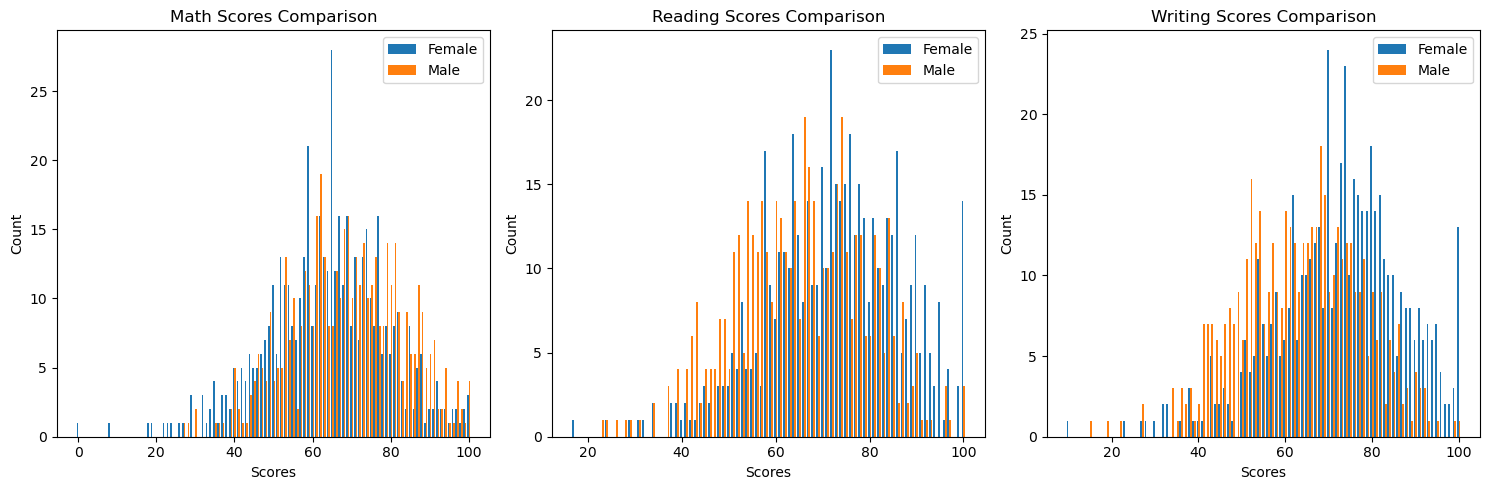

In [19]:
# show who is better in Math, Reading and Writing - females or males

counts_female_math = df_female['Matematike'].value_counts().sort_index()
counts_female_read = df_female['Lexim'].value_counts().sort_index()
counts_female_write = df_female['Shkrim'].value_counts().sort_index()


counts_male_math = df_male['Matematike'].value_counts().sort_index()
counts_male_read = df_male['Lexim'].value_counts().sort_index()
counts_male_write = df_male['Shkrim'].value_counts().sort_index()


# Create bar charts to compare females and males in Math, Reading, and Writing
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Math comparison
axes[0].bar(counts_female_math.index - 0.2, counts_female_math.values, width=0.4, label='Female')
axes[0].bar(counts_male_math.index + 0.2, counts_male_math.values, width=0.4, label='Male')
axes[0].set_title('Math Scores Comparison')
axes[0].set_xlabel('Scores')
axes[0].set_ylabel('Count')
axes[0].legend()

# Reading comparison
axes[1].bar(counts_female_read.index - 0.2, counts_female_read.values, width=0.4, label='Female')
axes[1].bar(counts_male_read.index + 0.2, counts_male_read.values, width=0.4, label='Male')
axes[1].set_title('Reading Scores Comparison')
axes[1].set_xlabel('Scores')
axes[1].set_ylabel('Count')
axes[1].legend()

# Writing comparison
axes[2].bar(counts_female_write.index - 0.2, counts_female_write.values, width=0.4, label='Female')
axes[2].bar(counts_male_write.index + 0.2, counts_male_write.values, width=0.4, label='Male')
axes[2].set_title('Writing Scores Comparison')
axes[2].set_xlabel('Scores')
axes[2].set_ylabel('Count')
axes[2].legend()

plt.savefig('results/show who is better in Math, Reading and Writing - females or males.png', format='png')


plt.tight_layout()
plt.show()

## Performance prediction


## Performance of Students In Exams


In [20]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Features and target
X = data.drop(['Matematike', 'Lexim', 'Shkrim'], axis=1)
y_math = data['Matematike']
y_reading = data['Lexim']
y_writing = data['Shkrim']

In [21]:
# Split the data
X_train, X_test, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.2, random_state=42)
X_train, X_test, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.2, random_state=42)
X_train, X_test, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.2, random_state=42)


In [22]:
# Train the model for Math
model_math = LinearRegression()
model_math.fit(X_train, y_train_math)

# Train the model for Reading
model_reading = LinearRegression()
model_reading.fit(X_train, y_train_reading)

# Train the model for Writing
model_writing = LinearRegression()
model_writing.fit(X_train, y_train_writing)

LinearRegression()

In [23]:
# Predict and evaluate for Math
y_pred_math = model_math.predict(X_test)
mse_math = mean_squared_error(y_test_math, y_pred_math)
r2_math = r2_score(y_test_math, y_pred_math)

print(f'Math - MSE: {mse_math}, R^2: {r2_math}')


Math - MSE: 202.87356439155698, R^2: 0.16629038248152794


In [24]:
# Predict and evaluate for Reading
y_pred_reading = model_reading.predict(X_test)
mse_reading = mean_squared_error(y_test_reading, y_pred_reading)
r2_reading = r2_score(y_test_reading, y_pred_reading)

print(f'Reading - MSE: {mse_reading}, R^2: {r2_reading}')


Reading - MSE: 196.52842652573906, R^2: 0.1314980253243776


In [25]:
# Predict and evaluate for Writing
y_pred_writing = model_writing.predict(X_test)
mse_writing = mean_squared_error(y_test_writing, y_pred_writing)
r2_writing = r2_score(y_test_writing, y_pred_writing)

print(f'Writing - MSE: {mse_writing}, R^2: {r2_writing}')


Writing - MSE: 192.73138710353217, R^2: 0.20034102534258358


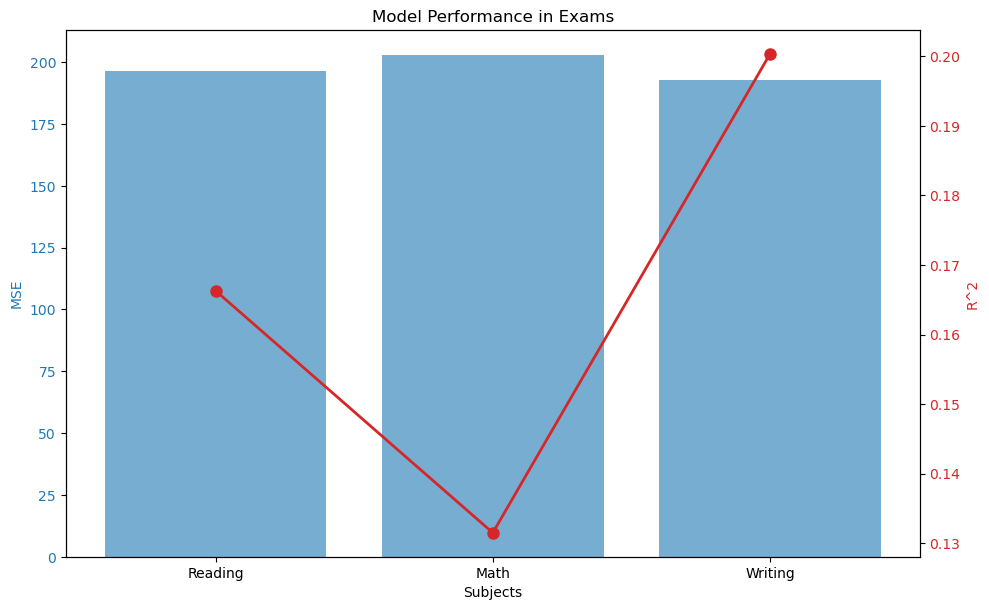

In [26]:
# plot the prediction of Reading, Writing and Math for students both gender
# Data for plotting
subjects = [ 'Reading', 'Math', 'Writing']
mse_values = [mse_reading, mse_math, mse_writing]
r2_values = [r2_math, r2_reading, r2_writing]

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Subjects')
ax1.set_ylabel('MSE', color=color)
ax1.bar(subjects, mse_values, color=color, alpha=0.6, label='MSE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R^2', color=color)
ax2.plot(subjects, r2_values, color=color, marker='o', linestyle='-', linewidth=2, markersize=8, label='R^2')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Model Performance in Exams')

plt.savefig('results/Model Performance in Exams.png', format='png')


plt.show()

#### Predict who is better in Math,Reading and Writing gender based 

In [27]:
# Encode the categorical target variable (Gjinia) to numerical values
label_encoder = LabelEncoder()
data['Gjinia'] = label_encoder.fit_transform(data['Gjinia'])

In [28]:
# Select the features for the model
X = data[['Matematike', 'Lexim', 'Shkrim']]
y = data['Gjinia']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       143
           1       0.92      0.86      0.89       157

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

Accuracy: 0.89


In [31]:
# Display the model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

print(coefficients)

      Feature  Coefficient
0  Matematike     0.362494
1       Lexim    -0.068279
2      Shkrim    -0.318444


In [32]:
import statsmodels.api as sm


# Add an intercept to the features
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Display the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.300722
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Gjinia   No. Observations:                  700
Model:                          Logit   Df Residuals:                      696
Method:                           MLE   Df Model:                            3
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                  0.5645
Time:                        13:36:52   Log-Likelihood:                -210.51
converged:                       True   LL-Null:                       -483.42
Covariance Type:            nonrobust   LLR p-value:                5.593e-118
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2306      0.632      3.527      0.000       0.991       3.470
Matematike     0.3630      0.

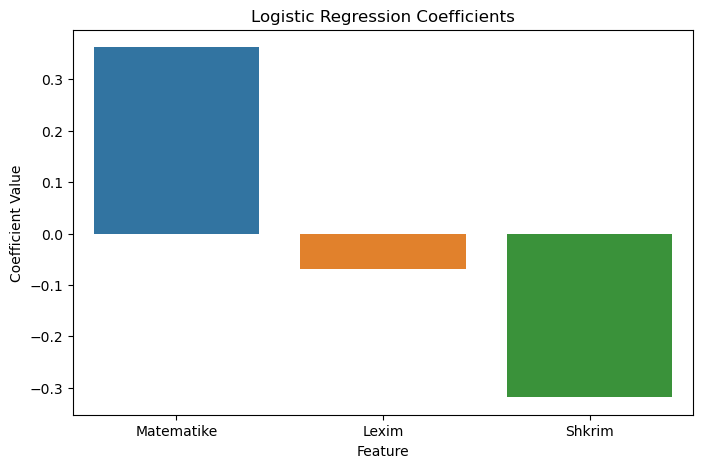

This bar plot shows the magnitude and direction of each feature’s influence on the gender prediction.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns



# Plot the coefficients of the logistic regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Feature', y='Coefficient', data=coefficients)
plt.title('Logistic Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')

plt.savefig('results/Logistic Regression Coefficients.png', format='png')
plt.show()

print("This bar plot shows the magnitude and direction of each feature’s influence on the gender prediction.")


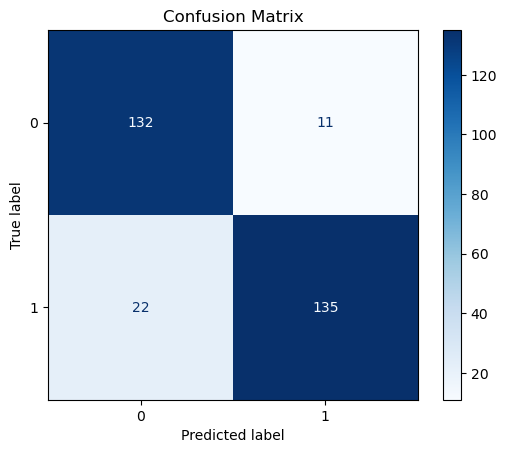

Predicted labels: female = 1, male = 0
This matrix displays the counts of true positives, true negatives, false positives, and false negatives, giving you a deeper insight into the model's performance.


In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('results/Confusion Matrix.png', format='png')

plt.show()

print("Predicted labels: female = 1, male = 0")
print("This matrix displays the counts of true positives, true negatives, false positives, and false negatives, giving you a deeper insight into the model's performance.")

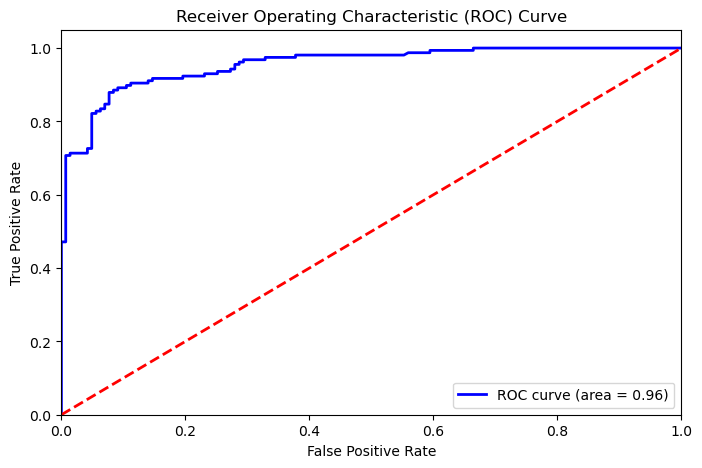

The ROC curve visualizes the performance of the model at different thresholds, with the AUC (Area Under the Curve) providing a single metric summarizing the model's ability to distinguish between classes.


In [53]:
from sklearn.metrics import roc_curve, auc

# Get the probability scores for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.savefig('results/Receiver Operating Characteristic (ROC) Curve.png', format='png')

plt.show()

print("The ROC curve visualizes the performance of the model at different thresholds, with the AUC (Area Under the Curve) providing a single metric summarizing the model's ability to distinguish between classes.")

In [54]:
from sklearn.metrics import mean_squared_error

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Display accuracy and MSE
print(f"Accuracy: {accuracy:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Accuracy: 0.89
Mean Squared Error (MSE): 0.11


## Gender Prediction


In [55]:
# Encode categorical variables and the target variable (Gender)
from sklearn.preprocessing import StandardScaler


label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target
X = df.drop(['Gjinia'], axis=1)
y= df['Gjinia']
print(f"{X}, {y}")

     Raca/Etniciteti  Niveli_edukimit_prindit  Shujta_drekes_pakoja  \
0                  1                        1                     1   
1                  2                        4                     1   
2                  1                        3                     1   
3                  0                        0                     0   
4                  2                        4                     1   
..               ...                      ...                   ...   
995                4                        3                     1   
996                2                        2                     0   
997                2                        2                     0   
998                3                        4                     1   
999                3                        4                     0   

     Kurse_parapregaditore_ekstra  Matematike  Lexim  Shkrim  
0                               1          72     72      74  
1                    

In [56]:
# Split the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Train a Logistic Regression model
model = LogisticRegression( max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

#print(f'Model prediction: {y_pred}')

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.52      1.00      0.69       157

    accuracy                           0.52       300
   macro avg       0.26      0.50      0.34       300
weighted avg       0.27      0.52      0.36       300



/home/blina/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/blina/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/blina/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/blina/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

## Correlations between different attributes

In [67]:
#### Show correlation between Math, Reading, Writing

fetuare = ['Matematike',	'Lexim',	'Shkrim']
corr_matrix = data[fetuare].corr()

corr_matrix

,Matematike,Lexim,Shkrim
Matematike,1.000000,0.817580,0.802642
Lexim,0.817580,1.000000,0.954598
Shkrim,0.802642,0.954598,1.000000


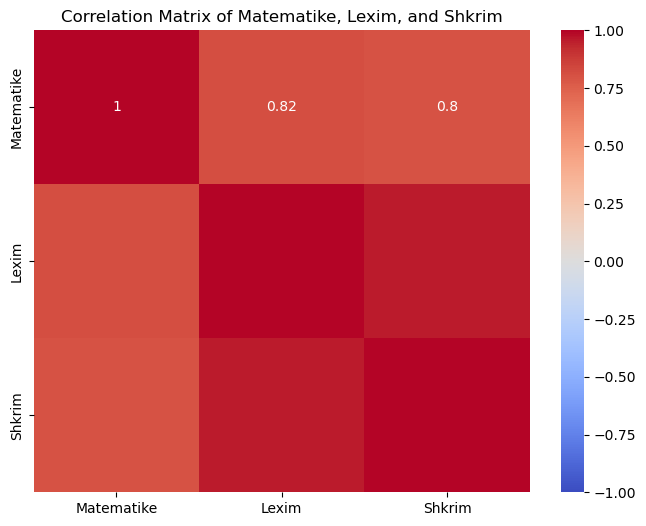

In [68]:

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Add titles and labels
plt.title('Correlation Matrix of Matematike, Lexim, and Shkrim')
plt.savefig('results/Correlation Matrix of Matematike, Lexim, and Shkrim.png', format='png')


plt.show()